In [1]:
!pip3 install pandas
import pandas as pd
import re

Failed to execute process '/home/paul/git/ir-lab/.venv/bin/pip3'. Reason:
The file '/home/paul/git/ir-lab/.venv/bin/pip3' specified the interpreter '/home/paul/git/ir-lab-jena-leipzig-wise-2023-geometric-tortoise/.venv/bin/python', which is not an executable command.


### Herausfinden des Schwellwerts

In [2]:
df = pd.read_xml("topics-anonymized.xml")
df.head()

,number,title,description,narrative
0,1,the frequency of solar storms with impact on e...,\n How often do solar storms occur which ...,\n Scientific publications or articles wh...
1,2,popular pastries in germany,\n Which are the best-selling pastries in...,"\n Find statistics, news articles or othe..."
2,3,flights Frankfurt to Rome,\n Show flight connections from Frankfurt...,\n Relevant are all future flight connect...
3,4,remove wine stains,\n How can wine stains be removed?\n,\n Relevant is all information about wine...
4,5,tipping in us,\n What tipping is considered appropriate...,\n We ask for some guidelines of how to c...


In [3]:
df["length"] = df["title"].map(lambda x: len(x))
# Calculation of the number of words in the title using the pyterrier tokenizer
# https://pyterrier.readthedocs.io/en/latest/text.html#working-with-passages-rather-than-documents : r'\s+' instead of ' '
df["word_count"] = df["title"].map(lambda x: len(re.split(r'\s+', x)))
df.head()

,number,title,description,narrative,length,word_count
0,1,the frequency of solar storms with impact on e...,\n How often do solar storms occur which ...,\n Scientific publications or articles wh...,71,12
1,2,popular pastries in germany,\n Which are the best-selling pastries in...,"\n Find statistics, news articles or othe...",27,4
2,3,flights Frankfurt to Rome,\n Show flight connections from Frankfurt...,\n Relevant are all future flight connect...,25,4
3,4,remove wine stains,\n How can wine stains be removed?\n,\n Relevant is all information about wine...,18,3
4,5,tipping in us,\n What tipping is considered appropriate...,\n We ask for some guidelines of how to c...,13,3


array([[<Axes: title={'center': 'length'}>]], dtype=object)

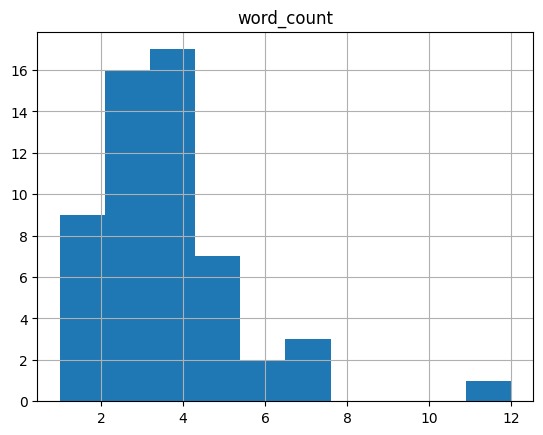

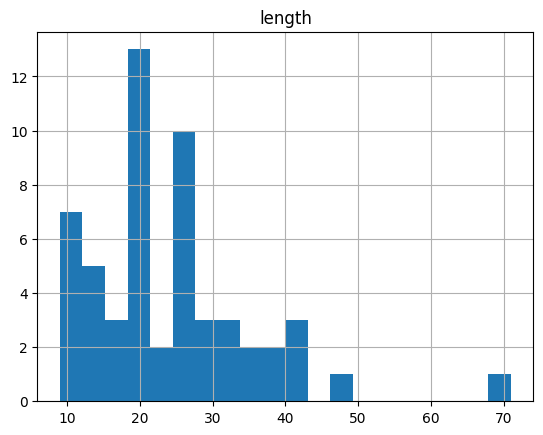

In [4]:
df.hist(column="word_count")
df.hist(column="length", bins=20)

In [5]:
median = df["word_count"].median()
groups_df = pd.DataFrame({f"median = {median}": ["below", "above"], 
                           "# topics with median not included": [len(df[df["word_count"] < median]), len(df[df["word_count"] > median])], 
                           "# topics with median included": [len(df[df["word_count"] <= median]), len(df[df["word_count"] >= median])]})
groups_df = groups_df.style.highlight_max("# topics with median not included", props="font-weight: bold").highlight_min("# topics with median included", props="font-weight: bold")
groups_df

,median = 4.0,# topics with median not included,# topics with median included
0,below,25,42
1,above,13,30
